In [1]:
import pandas as pd
import numpy as np

In [2]:
covid_word = pd.read_csv('C:\\Users\\thaku\\owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150624,ZWE,Africa,Zimbabwe,2021-12-24,202736.0,1392.0,1881.286,4871.0,16.0,13.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
150625,ZWE,Africa,Zimbabwe,2021-12-25,203746.0,1010.0,2025.571,4885.0,14.0,15.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
150626,ZWE,Africa,Zimbabwe,2021-12-26,204351.0,605.0,1811.143,4891.0,6.0,15.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
150627,ZWE,Africa,Zimbabwe,2021-12-27,205449.0,1098.0,1481.429,4908.0,17.0,14.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150629 entries, 0 to 150628
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    150629 non-null  object 
 1   continent                                   141544 non-null  object 
 2   location                                    150629 non-null  object 
 3   date                                        150629 non-null  object 
 4   total_cases                                 148014 non-null  float64
 5   new_cases                                   147973 non-null  float64
 6   new_cases_smoothed                          146822 non-null  float64
 7   total_deaths                                130914 non-null  float64
 8   new_deaths                                  131090 non-null  float64
 9   new_deaths_smoothed                         130958 non-null  float64
 

In [4]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
150624,ZWE,Africa,Zimbabwe,tests performed
150625,ZWE,Africa,Zimbabwe,tests performed
150626,ZWE,Africa,Zimbabwe,tests performed
150627,ZWE,Africa,Zimbabwe,NaN


In [5]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
150624    2021-12-24
150625    2021-12-25
150626    2021-12-26
150627    2021-12-27
150628    2021-12-28
Name: date, Length: 150629, dtype: object

Changing data type of columns

In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] = covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,150629,141544,150629,74403
unique,238,6,238,4
top,PER,Africa,Argentina,tests performed
freq,728,35732,728,47294


In [7]:
covid_word['tests_units'].cat.categories

Index(['people tested', 'samples tested', 'tests performed', 'units unclear'], dtype='object')

In [8]:
covid_word['tests_units'].value_counts().to_frame()

,tests_units
tests performed,47294
people tested,13634
samples tested,12142
units unclear,1333


In [9]:
covid_word.groupby('tests_units')['total_cases'].sum().sort_values(ascending=False).to_frame()

,total_cases
tests_units,
tests performed,4.953314e+10
samples tested,1.164950e+10
people tested,9.273229e+09
units unclear,1.268784e+08


In [10]:
p_covid = pd.pivot_table(covid_word, values= 'total_cases', index= ['date'], columns=['continent'], aggfunc='sum', margins=False)
p_covid

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-12-24,9410387.0,83982056.0,83840740.0,61935001.0,453358.0,39388116.0
2021-12-25,9451463.0,84030617.0,84157158.0,62008450.0,462953.0,39411558.0
2021-12-26,9475162.0,84119051.0,84296588.0,62200414.0,472881.0,39430318.0


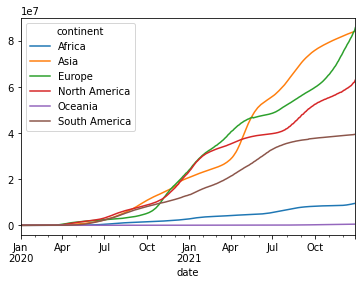

In [11]:
p_covid.plot()
import matplotlib.pyplot as plt
plt.show()

Elimination of missing data

In [12]:
p_covid = p_covid.dropna()
p_covid

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-12-24,9410387.0,83982056.0,83840740.0,61935001.0,453358.0,39388116.0
2021-12-25,9451463.0,84030617.0,84157158.0,62008450.0,462953.0,39411558.0
2021-12-26,9475162.0,84119051.0,84296588.0,62200414.0,472881.0,39430318.0


Forecasting

In [13]:
pd.options.display.float_format = '{:,.2f}'.format
p_covid.corr()

continent,Africa,Asia,Europe,North America,Oceania,South America
continent,,,,,,
Africa,1.00,0.99,0.98,0.99,0.87,0.99
Asia,0.99,1.00,0.98,0.97,0.88,0.99
Europe,0.98,0.98,1.00,0.99,0.85,0.98
North America,0.99,0.97,0.99,1.00,0.83,0.98
Oceania,0.87,0.88,0.85,0.83,1.00,0.81
South America,0.99,0.99,0.98,0.98,0.81,1.00


In [14]:
#Splitting the DataSet into training and test sets
proportion_train_test = 0.7
l = int(proportion_train_test * len(p_covid))
col = p_covid.columns

In [15]:
# Slices:
X_train, X_test, y_train, y_test = p_covid[col[1:]][:l], p_covid[col[1:]][l:], p_covid[col[0]][:l], p_covid[col[0]][l:]

In [16]:
# sklearn function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p_covid[col[1:]], p_covid[col[0]], test_size=0.3, shuffle=False)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [18]:
#Calculation of basic statistical indicators
from sklearn import metrics
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print("Coefficients:", regressor.coef_)
# pair the feature names with the coefficients
print('Pair the feature names with the coefficients:')
for s in zip(col[1:], regressor.coef_):
    print(s[0], ":", s[1])
print("Intercept", regressor.intercept_)
print('Mean Absolute Error (train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error (test):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (train):', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Squared Error (test):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error (test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Correlation train 0.9994428702411682
Correlation test 0.4694924106693764
Coefficients: [-0.01739774 -0.03609418  0.10101584  3.85319092  0.11529132]
Pair the feature names with the coefficients:
Asia : -0.017397740752943945
Europe : -0.03609418026195859
North America : 0.10101583795967933
Oceania : 3.8531909223864913
South America : 0.11529132334593663
Intercept -33749.704597964184
Mean Absolute Error (train): 32565.736796643447
Mean Absolute Error (test): 913301.588301281
Mean Squared Error (train): 1470624153.2791083
Mean Squared Error (test): 1052006262289.3336
Root Mean Squared Error (train): 38348.71775273729
Root Mean Squared Error (test): 1025673.5651703877


In [19]:
#Creating models using statsmodels
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred_test_OLS = results.predict(X_test)
y_pred_train_OLS = results.predict(X_train)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Africa   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.124e+05
Date:                Sat, 08 Jan 2022   Prob (F-statistic):                        0.00
Time:                        23:37:33   Log-Likelihood:                         -6142.8
No. Observations:                 509   AIC:                                  1.230e+04
Df Residuals:                     504   BIC:                                  1.232e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [20]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params, sep = '\n')

coefficient of determination: 0.9996774384333103
adjusted coefficient of determination: 0.9996742384177677
regression coefficients:
Asia            -0.02
Europe          -0.04
North America    0.10
Oceania          1.54
South America    0.12
dtype: float64


In [21]:
df_test = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, 'Predicted_test_OLS': y_pred_test_OLS})
df_train = pd.DataFrame({'Actual_train': y_train, 'Predicted_train': y_pred_train, 'Predicted_train_OLS': y_pred_train_OLS})
df = df_train.join(df_test, how='outer')
df

,Actual_train,Predicted_train,Predicted_train_OLS,Actual_test,Predicted_test,Predicted_test_OLS
date,,,,,,
2020-01-01,0.00,"-33,749.70",0.00,NaN,NaN,NaN
2020-01-02,0.00,"-33,749.70",0.00,NaN,NaN,NaN
2020-01-03,0.00,"-33,749.70",0.00,NaN,NaN,NaN
2020-01-04,0.00,"-33,749.70",0.00,NaN,NaN,NaN
2020-01-05,0.00,"-33,749.70",0.00,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-24,NaN,NaN,NaN,"9,410,387.00","8,023,388.45","7,210,953.06"
2021-12-25,NaN,NaN,NaN,"9,451,463.00","8,058,216.29","7,223,388.12"
2021-12-26,NaN,NaN,NaN,"9,475,162.00","8,111,453.87","7,253,983.41"


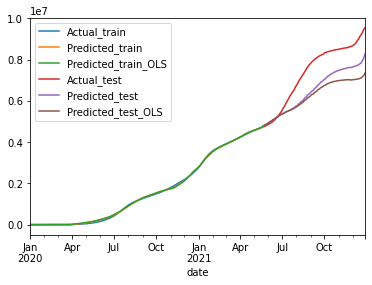

In [22]:
df.plot()
plt.show()

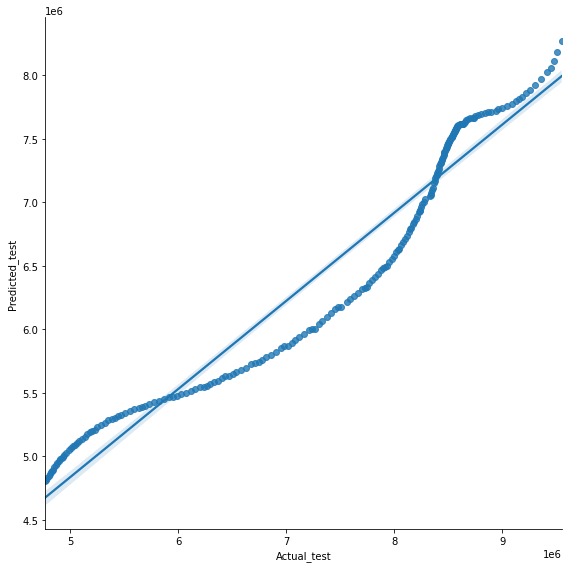

In [23]:
import seaborn as sns
sns.pairplot(df_test, x_vars=['Actual_test'], y_vars='Predicted_test',  kind='reg', height = 8)
plt.show()

In [24]:
#Forecasting time series
def lag_correlation_ts(y, x, lag):
    """
    Lag correlation for 2 DateSeries
    :param y: fixed
    :param x: shifted
    :param lag: lag for shifting
    :return: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

In [25]:
y_dataset = p_covid[col[0]]
y_dataset

date
2020-01-01           0.00
2020-01-02           0.00
2020-01-03           0.00
2020-01-04           0.00
2020-01-05           0.00
                 ...     
2021-12-24   9,410,387.00
2021-12-25   9,451,463.00
2021-12-26   9,475,162.00
2021-12-27   9,507,764.00
2021-12-28   9,548,971.00
Name: Africa, Length: 728, dtype: float64

In [26]:
#Let's test a 30-day lag.
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 30))
l

,Correlation
Lag,
0,1.0000
1,1.0000
2,1.0000
3,1.0000
4,0.9999
5,0.9999
6,0.9998
7,0.9998
8,0.9997


In [27]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample, taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field. If taken into account, the input will start with lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    # for i in range(n_in, -1, -1):
    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        # print(tar_data.name)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [28]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 30)
dataset

,Africa(t-0),Africa(t-1),Africa(t-2),Africa(t-3),Africa(t-4),Africa(t-5),Africa(t-6),Africa(t-7),Africa(t-8),Africa(t-9),...,Africa(t-22),Africa(t-23),Africa(t-24),Africa(t-25),Africa(t-26),Africa(t-27),Africa(t-28),Africa(t-29),Africa(t-30),Africa
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,"9,410,387.0000","9,361,022.0000","9,305,124.0000","9,254,146.0000","9,218,601.0000","9,185,229.0000","9,156,105.0000","9,127,904.0000","9,086,347.0000","9,042,024.0000",...,"8,682,096.0000","8,666,052.0000","8,653,069.0000","8,644,731.0000","8,638,043.0000","8,632,470.0000","8,626,911.0000","8,621,181.0000","8,615,304.0000","9,410,387.0000"
2021-12-25,"9,451,463.0000","9,410,387.0000","9,361,022.0000","9,305,124.0000","9,254,146.0000","9,218,601.0000","9,185,229.0000","9,156,105.0000","9,127,904.0000","9,086,347.0000",...,"8,703,582.0000","8,682,096.0000","8,666,052.0000","8,653,069.0000","8,644,731.0000","8,638,043.0000","8,632,470.0000","8,626,911.0000","8,621,181.0000","9,451,463.0000"
2021-12-26,"9,475,162.0000","9,451,463.0000","9,410,387.0000","9,361,022.0000","9,305,124.0000","9,254,146.0000","9,218,601.0000","9,185,229.0000","9,156,105.0000","9,127,904.0000",...,"8,724,117.0000","8,703,582.0000","8,682,096.0000","8,666,052.0000","8,653,069.0000","8,644,731.0000","8,638,043.0000","8,632,470.0000","8,626,911.0000","9,475,162.0000"


In [29]:
col_2 = dataset.columns
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(dataset[col_2[1:-2]], dataset[col_2[-1]], test_size=0.3, shuffle=False)
regressor2 = LinearRegression()
regressor2.fit(X_train_2, y_train_2)
y_pred_test_2 = regressor2.predict(X_test_2)

In [30]:
print("Correlation train", regressor2.score(X_train_2, y_train_2))
print("Correlation test", regressor2.score(X_test_2, y_test_2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_test_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_test_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_2)))

Correlation train 0.999999177037358
Correlation test 0.9999824164412837
Mean Absolute Error: 3663.7662894348923
Mean Squared Error: 31039285.52611264
Root Mean Squared Error: 5571.291190210097


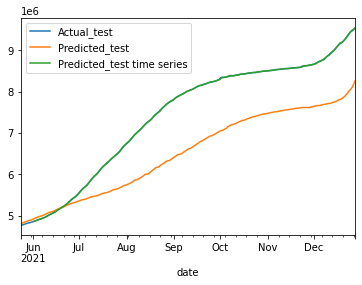

In [31]:
y_pred_test_2 = pd.DataFrame(y_pred_test_2, columns = ['Predicted_test time series'])
y_pred_test_2.index = y_test_2.index
df_2 = pd.DataFrame({'Actual_test': y_test, 'Predicted_test': y_pred_test, })
df_2 = df_2.join(y_pred_test_2, how='outer')
df_2.plot()
plt.show()

# Interactive maps

In [32]:
#Data transformation for mapping
import plotly.express as px

In [33]:
!pip install plotly

In [34]:
covid_EU = covid_word[covid_word.continent == "Europe"]
covid_EU = covid_EU[["location", "date", "total_cases"]].sort_values(["location", "date"])
covid_EU

,location,date,total_cases
1359,Albania,2020-02-25,NaN
1360,Albania,2020-02-26,NaN
1361,Albania,2020-02-27,NaN
1362,Albania,2020-02-28,NaN
1363,Albania,2020-02-29,NaN
...,...,...,...
146192,Vatican,2021-12-24,27.0000
146193,Vatican,2021-12-25,27.0000
146194,Vatican,2021-12-26,27.0000
146195,Vatican,2021-12-27,27.0000


In [35]:
#Before visualization, we should delete NaN data:
modified_confirmed_EU = covid_EU[np.isnan(covid_EU.total_cases) == False]
modified_confirmed_EU

,location,date,total_cases
1372,Albania,2020-03-09,2.0000
1373,Albania,2020-03-10,10.0000
1374,Albania,2020-03-11,12.0000
1375,Albania,2020-03-12,23.0000
1376,Albania,2020-03-13,33.0000
...,...,...,...
146192,Vatican,2021-12-24,27.0000
146193,Vatican,2021-12-25,27.0000
146194,Vatican,2021-12-26,27.0000
146195,Vatican,2021-12-27,27.0000


In [36]:
c = 'total_cases'
modified_confirmed_EU.loc[:, c] = modified_confirmed_EU[c].astype('int64')
modified_confirmed_EU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32930 entries, 1372 to 146196
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     32930 non-null  category      
 1   date         32930 non-null  datetime64[ns]
 2   total_cases  32930 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 846.1 KB


C:\Users\thaku\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
modified_confirmed_EU=modified_confirmed_EU.set_index('date').groupby('location')

In [38]:
modified_confirmed_EU = modified_confirmed_EU.resample('M').sum()
print(modified_confirmed_EU)

                    location  total_cases
location date                            
Albania  2020-03-31      NaN         2232
         2020-04-30      NaN        15632
         2020-05-31      NaN        28873
         2020-06-30      NaN        50880
         2020-07-31      NaN       119660
...                      ...          ...
Vatican  2021-08-31      NaN          837
         2021-09-30      NaN          810
         2021-10-31      NaN          837
         2021-11-30      NaN          810
         2021-12-31      NaN          756

[1110 rows x 2 columns]


In [39]:
modified_confirmed_EU.loc[:,'location'] = modified_confirmed_EU.index.get_level_values(0)
modified_confirmed_EU.loc[:,'Date'] = modified_confirmed_EU.index.get_level_values(1).astype('str')

print(modified_confirmed_EU)

                    location  total_cases        Date
location date                                        
Albania  2020-03-31  Albania         2232  2020-03-31
         2020-04-30  Albania        15632  2020-04-30
         2020-05-31  Albania        28873  2020-05-31
         2020-06-30  Albania        50880  2020-06-30
         2020-07-31  Albania       119660  2020-07-31
...                      ...          ...         ...
Vatican  2021-08-31  Vatican          837  2021-08-31
         2021-09-30  Vatican          810  2021-09-30
         2021-10-31  Vatican          837  2021-10-31
         2021-11-30  Vatican          810  2021-11-30
         2021-12-31  Vatican          756  2021-12-31

[1110 rows x 3 columns]


# Downloading polygons of maps

In [44]:
'''import json
#!wget european-union-countries.geojson "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-prognostication-and-geo-visualization/european-union-countries.geojson"
with open("C:\\Users\\thaku\\european-union-countries.geojson", encoding="utf8") as json_file:
    EU_map = json.load(json_file)'''

'import json\n#!wget european-union-countries.geojson "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-health-care-basic-prognostication-and-geo-visualization/european-union-countries.geojson"\nwith open("C:\\Users\\thaku\\european-union-countries.geojson", encoding="utf8") as json_file:\n    EU_map = json.load(json_file)'

In [45]:
'''fig = px.choropleth(
    modified_confirmed_EU[::-1],
    geojson=EU_map,
    locations='location',
    featureidkey='properties.name',    
    color= 'total_cases', 
    scope='europe',
    hover_name= 'location',
    hover_data= ['location', 'total_cases'],
    animation_frame= 'Date', 
    color_continuous_scale=px.colors.diverging.RdYlGn[::-1]
)'''

"fig = px.choropleth(\n    modified_confirmed_EU[::-1],\n    geojson=EU_map,\n    locations='location',\n    featureidkey='properties.name',    \n    color= 'total_cases', \n    scope='europe',\n    hover_name= 'location',\n    hover_data= ['location', 'total_cases'],\n    animation_frame= 'Date', \n    color_continuous_scale=px.colors.diverging.RdYlGn[::-1]\n)"

In [46]:
'''fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")

fig.update_layout(
    title_text ="COVID-19 Spread EU",
    title_x = 0.5,
    geo= dict(
        showframe= False,
        showcoastlines= False,
        projection_type = 'equirectangular'
    ),
    margin={"r":0,"t":0,"l":0,"b":0}
)'''

'fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")\n\nfig.update_layout(\n    title_text ="COVID-19 Spread EU",\n    title_x = 0.5,\n    geo= dict(\n        showframe= False,\n        showcoastlines= False,\n        projection_type = \'equirectangular\'\n    ),\n    margin={"r":0,"t":0,"l":0,"b":0}\n)'

In [48]:
'''from IPython.display import HTML
HTML(fig.to_html())'''

'from IPython.display import HTML\nHTML(fig.to_html())'